# Data Mining Project
### Giorgio Donati, g.donati24@studenti.unipi.it
### Pietro Francaviglia, p.francaviglia1@studenti.unipi.it
#### A.Y. 2021-2022


## Libraries and datasets

In [1]:
import itertools
from sklearn import tree
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier

from t3_constants import *
from t3_utility import *

In [2]:
with open(f'{PICKLE_FOLDER}{LABELLED}{USER_DF}.pkl', 'rb') as f:
    u_df = pickle.load(f)

with open(f'{PICKLE_FOLDER}{PURE}{LABELLED}{USER_DF}.pkl', 'rb') as f:
    pure_u_df = pickle.load(f)

In [3]:
p_df = u_df[[ICNT, AIXB, PSUM]]
p_a, p_df = scale_df(p_df, 1)
p_df[WLAB] = p_df[ICNT] + p_df[AIXB] + p_df[PSUM]
p_df[LAB] = rankings(p_df[WLAB], 1, 8)
p_df[LAB] = p_df[LAB].map({0:0, 1:0, 2:0, 3:1, 4:1, 5:1, 6:2, 7:2})
p_df.groupby(LAB).describe()

item_count                                                              \
           count      mean       std       min       25%       50%       75%   
label                                                                          
0          308.0 -0.887659  0.398174 -2.415338 -1.112577 -0.821599 -0.628418   
1          308.0  0.026090  0.373621 -0.956825 -0.251716  0.033225  0.294019   
2          206.0  1.288171  0.843177 -0.145467  0.815606  1.117450  1.507433   

                avg_items_per_basket            ... total_price            \
            max                count      mean  ...         75%       max   
label                                           ...                         
0      0.057372                308.0 -0.778212  ...   -0.558245  0.002177   
1      1.129524                308.0  0.002473  ...    0.273607  1.309472   
2      7.253345                206.0  1.159843  ...    1.480301  5.998578   

         all                                                              \
       count      mean       std       min       25%       50%       75%   
label                                                                      
0      308.0 -2.493911  0.988976 -6.131452 -3.135848 -2.372164 -1.658333   
1      308.0  0.011258  0.774210 -1.210484 -0.649912  0.016053  0.670142   
2      206.0  3.711929  2.445344  1.585543  2.236052  3.088995  4.274972   

                  
             max  
label             
0      -1.215557  
1       1.583923  
2      20.645309  

[3 rows x 32 columns]

<AxesSubplot:ylabel='Frequency'>

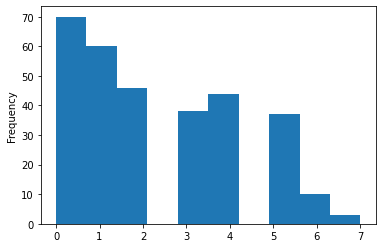

In [4]:
u_df[WLAB] = p_df[LAB]
u_df[u_df[WLAB] == 0][LAB].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

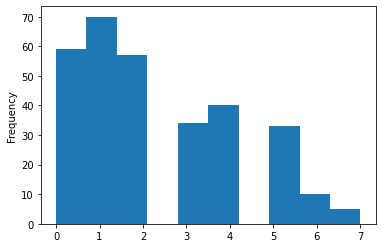

In [5]:
u_df[u_df[WLAB] == 1][LAB].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

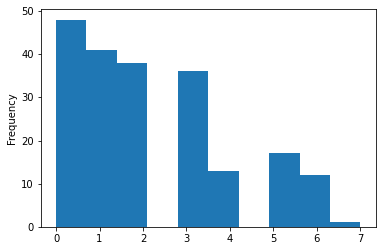

In [6]:
u_df[u_df[WLAB] == 2][LAB].plot(kind='hist')

In [7]:
u_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 822 entries, 1 to 822
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   item_count            822 non-null    int64  
 1   item_dist_count       822 non-null    int64  
 2   max_items_per_b       822 non-null    int64  
 3   price_entropy         822 non-null    float64
 4   max_item_dist_per_b   822 non-null    int64  
 5   total_price           822 non-null    float64
 6   basket_count          822 non-null    int64  
 7   category_count        822 non-null    int64  
 8   shop_count            822 non-null    int64  
 9   avg_items_per_basket  822 non-null    float64
 10  avg_baskets_per_d     822 non-null    float64
 11  label                 822 non-null    object 
 12  all                   822 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 89.9+ KB


In [8]:
train_x, test_x, train_y, test_y = train_test_split(
    u_df.drop(columns=[WLAB, LAB]),
    u_df[WLAB],
    test_size=0.2,
    stratify=u_df[WLAB])
x = train_x.values
y = train_y.values.ravel().astype(int)
y

array([0, 1, 2, 1, 1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1, 2, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 2, 2, 1, 2, 0, 1, 0, 1, 0, 0, 1, 2, 2,
       2, 0, 0, 2, 2, 0, 1, 1, 1, 1, 2, 1, 0, 0, 1, 2, 2, 2, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 0, 0, 1, 2, 0, 0, 2, 1, 0, 2,
       0, 2, 0, 1, 0, 0, 0, 0, 2, 1, 1, 1, 0, 2, 1, 2, 2, 2, 1, 2, 2, 0,
       1, 1, 0, 1, 2, 0, 2, 1, 1, 0, 0, 2, 0, 2, 1, 2, 0, 0, 1, 0, 2, 1,
       2, 2, 2, 1, 0, 2, 2, 1, 0, 2, 2, 1, 0, 1, 1, 0, 1, 1, 2, 2, 0, 1,
       0, 2, 1, 0, 0, 1, 0, 1, 0, 1, 2, 2, 1, 1, 1, 0, 2, 1, 0, 1, 2, 0,
       0, 2, 2, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 0, 1,
       0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 2, 1, 0, 0, 0, 2, 2, 0, 0,
       1, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1,
       0, 0, 0, 0, 0, 2, 2, 1, 2, 0, 0, 2, 0, 2, 1, 2, 2, 0, 0, 1, 1, 0,
       0, 2, 2, 0, 0, 1, 2, 1, 0, 0, 2, 1, 1, 1, 0, 1, 2, 0, 1, 0, 0, 2,
       1, 0, 1, 1, 1, 0, 1, 2, 0, 2, 1, 2, 1, 2, 1,

In [9]:
def cross_validation(model, X: np.ndarray, y: np.ndarray, n_splits: int) -> np.ndarray:
    """Return validation scores across the k folds of cross-validation."""
    skf = StratifiedKFold(n_splits=n_splits, random_state=0, shuffle=True)
    val_score = []
    for train_index, test_index in skf.split(X, y):
        model.fit(X[train_index], y[train_index].ravel())
        val_score.append(model.score(X[test_index], y[test_index].ravel() + 1))
    return np.array(val_score)

def cross_validation_summary(model, X: np.ndarray, y: np.ndarray, n_splits: int) -> np.ndarray:
    """Returns validation accuracy score of model (mean and std over all the splits)."""
    val_score = cross_validation(model, X, y, n_splits)
    return val_score.mean(), val_score.std()


In [10]:
## Hyper-parameters grid search for Decision Tree

hyp_dict = {
    'criterion': ['gini', 'entropy'],
    'min_impurity_decrease': [0, 1, 1e-1, 1e-2, 1e-3, 1e-4],
    'min_samples_leaf': [1, 3, 5]
}
combinations = itertools.product(*(hyp_dict[key] for key in sorted(hyp_dict)))

results = []

for criterion, min_impurity_decrease, min_samples_leaf in combinations:
    model = tree.DecisionTreeClassifier(
        criterion=criterion,
        min_impurity_decrease=min_impurity_decrease,
        min_samples_leaf=min_samples_leaf,
        random_state=0
    )
    mean_val_score, std_val_score = cross_validation_summary(model, x, y, 3)
    res = criterion, min_impurity_decrease, min_samples_leaf, mean_val_score, std_val_score
    results.append(res)

decision_tree_results_df = pd.DataFrame(results, columns=['criterion', 'min_impurity_decrease', 'min_samples_leaf', 'mean_val_score', 'std_val_score'])
decision_tree_results_df.sort_values('mean_val_score')

,criterion,min_impurity_decrease,min_samples_leaf,mean_val_score,std_val_score
3,gini,1.0000,1,0.000000,0.000000
4,gini,1.0000,3,0.000000,0.000000
5,gini,1.0000,5,0.000000,0.000000
21,entropy,1.0000,1,0.000000,0.000000
22,entropy,1.0000,3,0.000000,0.000000
23,entropy,1.0000,5,0.000000,0.000000
13,gini,0.0010,3,0.027397,0.003728
28,entropy,0.0100,3,0.033486,0.005695
27,entropy,0.0100,1,0.033486,0.011985
29,entropy,0.0100,5,0.035008,0.004305


In [11]:
decision_tree_results_df.groupby('criterion').mean()

,min_impurity_decrease,min_samples_leaf,mean_val_score,std_val_score
criterion,,,,
entropy,0.185183,3.0,0.031287,0.005730
gini,0.185183,3.0,0.038982,0.006555


[Text(0.5, 0.875, 'item_count <= 617.5\nentropy = 1.562\nsamples = 657\nvalue = [246, 246, 165]'),
 Text(0.25, 0.625, 'item_count <= 562.5\nentropy = 0.593\nsamples = 272\nvalue = [233, 39, 0]'),
 Text(0.125, 0.375, 'total_price <= 613407.125\nentropy = 0.199\nsamples = 194\nvalue = [188, 6, 0]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'avg_items_per_basket <= 12.406\nentropy = 0.983\nsamples = 78\nvalue = [45, 33, 0]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'item_count <= 823.5\nentropy = 1.17\nsamples = 385\nvalue = [13, 207, 165]'),
 Text(0.625, 0.375, 'total_price <= 717368.594\nentropy = 0.758\nsamples = 231\nvalue = [13, 196, 22]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'total_price <= 724729.5\nentropy = 0.371\nsamples = 154\nvalue = [0, 11, 143]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.

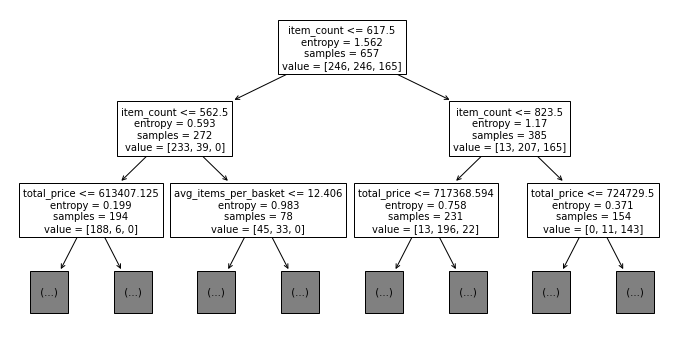

In [12]:
model = tree.DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.01, min_samples_leaf=1, random_state=0)
model.fit(x, y)
plt.figure(figsize=(12, 6))
tree.plot_tree(model, fontsize=10, max_depth=2, feature_names=train_x.columns)

In [13]:
pd.Series(model.feature_importances_, index = train_x.columns).sort_values()

item_dist_count         0.000000
max_items_per_b         0.000000
price_entropy           0.000000
basket_count            0.000000
category_count          0.000000
shop_count              0.000000
avg_baskets_per_d       0.000000
max_item_dist_per_b     0.008178
avg_items_per_basket    0.133297
total_price             0.153347
item_count              0.705178
dtype: float64

# Ensembling

In [14]:
def randomized_cv(model, random_grid, n_iter=100):
    """Perform hyper-parameters grid search and return best configuration."""
    rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = n_iter, cv = 5, verbose=0, random_state=0, n_jobs = -1)

    # Run grid search
    rf_random.fit(x, y)
    mean_acc, std_acc = cross_validation_summary(rf_random.best_estimator_, x, y, 5)

    # Print configuration  and stats about best model
    print(f'{rf_random.best_estimator_}\n mean acc: {mean_acc:.3f}\n std_acc: {std_acc:.3f}')

## Random Forest

In [15]:
# Perform the hyper-parameters grid-search on random forest
random_grid = dict(
    n_estimators = np.logspace(1, 2.5, num=10).astype(int).tolist(),
    max_features = ['sqrt'],
    max_depth = [None] + np.logspace(0.5, 2, num=9).astype(int).tolist(),
    min_samples_split = [2, 5, 10],
    min_samples_leaf = [1, 2, 4],
    bootstrap = [True, False]
)
randomized_cv(
    model=RandomForestClassifier(random_state=0),
    random_grid=random_grid,
    n_iter=1000
)

RandomForestClassifier(max_depth=17, n_estimators=215, random_state=0)
 mean acc: 0.037
 std_acc: 0.007
